## CNN 관련 개념 정리

#### 내 마음대로 정리한 CNN이란
---
- CNN은 다른 딥러닝 모델과 마찬가지로 가중치를 최적화하는 모델이지만,
- 이미지처럼 공간적 구조(H, W, 위치 관계) 가 있는 데이터를 전제로 설계되었고,
- 의미 있는 피처 표현(채널 수)은 늘리고,
- 공간 해상도(H, W)는 줄여 연산량을 감소시키는 구조이다.
- CNN은 공간정보를 “가지고 있다가” 필요할 때 “버리고(Flatten)” 1줄로 이어 붙일 수도 있다.
#### 내가 이해한 CNN의 핵심 메커니즘
---
- CNN의 가중치는 커널(kernel) 이라는 공유되는 가중치 묶음으로 구성되며,
- 이 커널은 입력 위를 윈도우처럼 슬라이딩하며 동일한 가중치를 적용함.
- 커널은 다른 가중치들과 마찬가지로 역전파를 통해 학습됨
- 하나의 커널은 하나의 특징 맵(feature map) 을 만들고, : 필터맵(Filter Map) 필터(커널) 하나가 입력에서 찾아낸 특징의 결과 지도
- 여러 커널을 사용하면 채널 수가 증가하여 표현력이 커진다.
- 이후 풀링 또는 스트라이드 합성곱을 통해 공간 크기(H, W)를 줄여 연산량을 감소시킨다.

#### 커널(kernel)과 유사한 용어 정리
---
- 커널은 가장 표준적인 용어, 수학이나 논문 프레이워크에서 많이 사용
- Filter: kernel과 사실상 동의어, CNN 설명에서 흔함
- Window: 커널의 슬라이딩되는 관점에서 사용.
- Receptive field(국소): 커널이 한 번에 보는 영역, 결과 개념
- Convolution Mask: 고전 CV 용어 (Sobel, Laplacian 등에서의 가중치 패턴)
- Weight Tensor: 구현 관점

#### conv1D, conv2D, conv3D 정리(데이터 특성 중심)
---
#### 1️⃣ Conv1D — 1차원 공간 데이터
- - 1차원 공간(길이 L)을 따라 의미가 존재하지만, 한 위치마다 여러 특성(feature, channel)이 있을 수 있음
  - 대표 데이터는 시계열 데이터, 음성 신호, 센서 데이터 (EEG, ECG, IMU 등), NLP에서의 임베딩 시퀀스
  - 파이토치 기준 Conv1d 형태 (N, C, L), (N = batch_size, C = channel, L = length) 
  - conv1d: 커널(가중치 묶음)은 L 방향으로만 슬라이딩하여 시간적/순차적 패턴을 추출
    
- 배치 처리와 다채널(feature)을 표현하기 위해 텐서는 3차원으로 구성되지만, 실제 합성곱이 적용되는 공간 차원은 1차원

#### 2️⃣ Conv2D — 2차원 공간 데이터
- - 2차원 공간(H, W) 에 의미가 분포하며 각 위치에 채널(feature)이 존재
  - 2D 데이터 대표적으로 이미지, 2D 히트맵, spectrogram (음성의 2D 표현)  2차원 공간으로 H, W로 표현
  - 파이토치 텐서 형태는 (N, C, H, W)이고 텐서플로우 넘파이는 (N, H, W, C)으로 표현

#### 3️⃣ Conv3D — 3차원 공간 데이터
- - 3차원 공간(D, H, W) 에 연속적인 의미로 시간 또는 깊이(depth)가 공간 차원으로 포함됨
  - 대표 데이터는 영상 데이터 (시간 × 높이 × 너비), CT, MRI 같은 의료 영상, 3D 볼륨 데이터
  - 공간 표현은 [D (Depth), H (Height), W (Width)]을 Pytorch는 (N, C, D, H, W), TensorFlow는 (N,  D, H, W, C)
  - N: batch, D: depth (time or volume depth), H: height, W: width, C: channel


### Convlutional Networks와 FC 레이어 및 활성화함수 비교

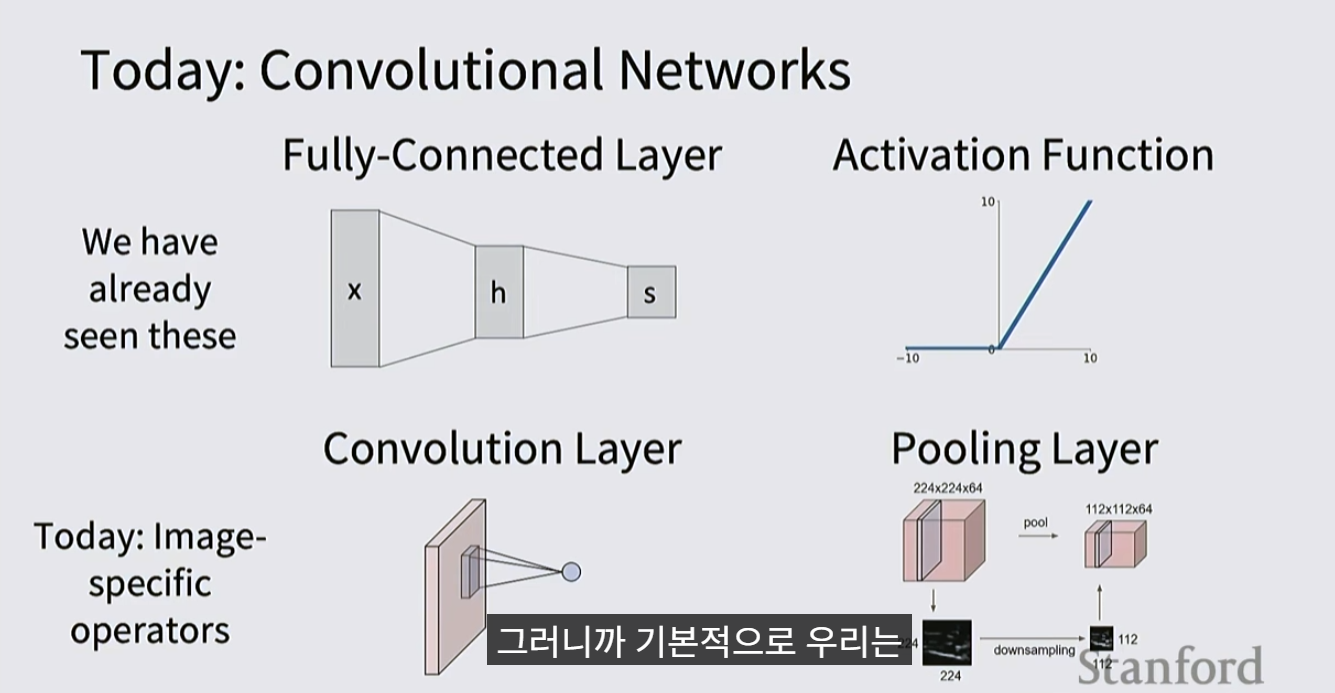

- FC 레이어는 32x32x3=3072 이미지와 동일한 크기의 템플릿(필터)으로 둘은 일치함
- 컨불루션은 필터가 이미지와 동일하지 않음, 이미지의 3차원 공간은 그대로 유지하는 해상도를 낮춘 하위 이미지로 3차원 텐서로 필터를 만듦

### 이미지와 필터의 내적 과정
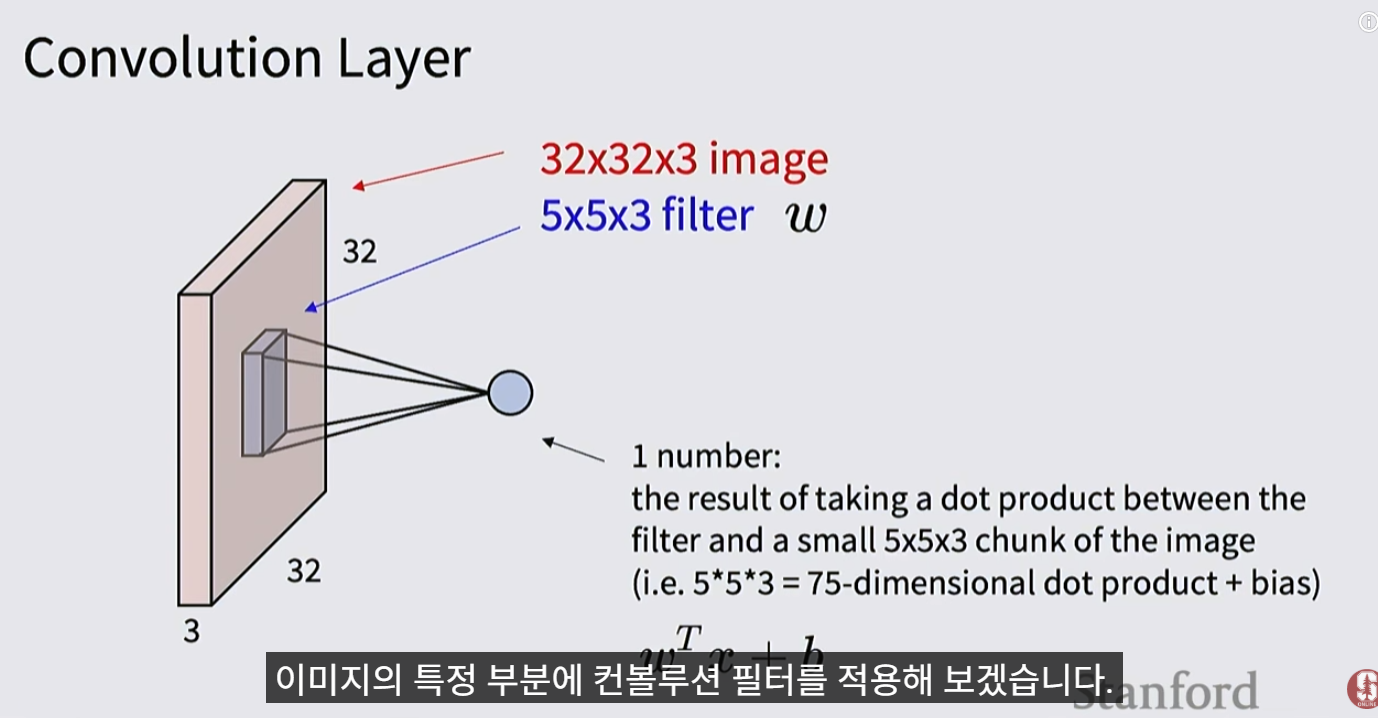

- 이미지(32×32×3 = 3072) 위에 청크와 템플릿(필터, 커널 5x5x3 - 75 dimensional dot product + bias->75개 벡터(숫자 75개가 들어 있는 배열)이 한 위치에서 내적 결과는 스칼라 1개 값이고 그 스칼라들의 위치별로 모인 결과 전체가 1개의 피처맵
- 필터 1개는 각 위치에서 스칼라 반응을 만들고, 그 반응들이 공간적으로 배열된 결과가 피처맵

### activation map(피처맵)

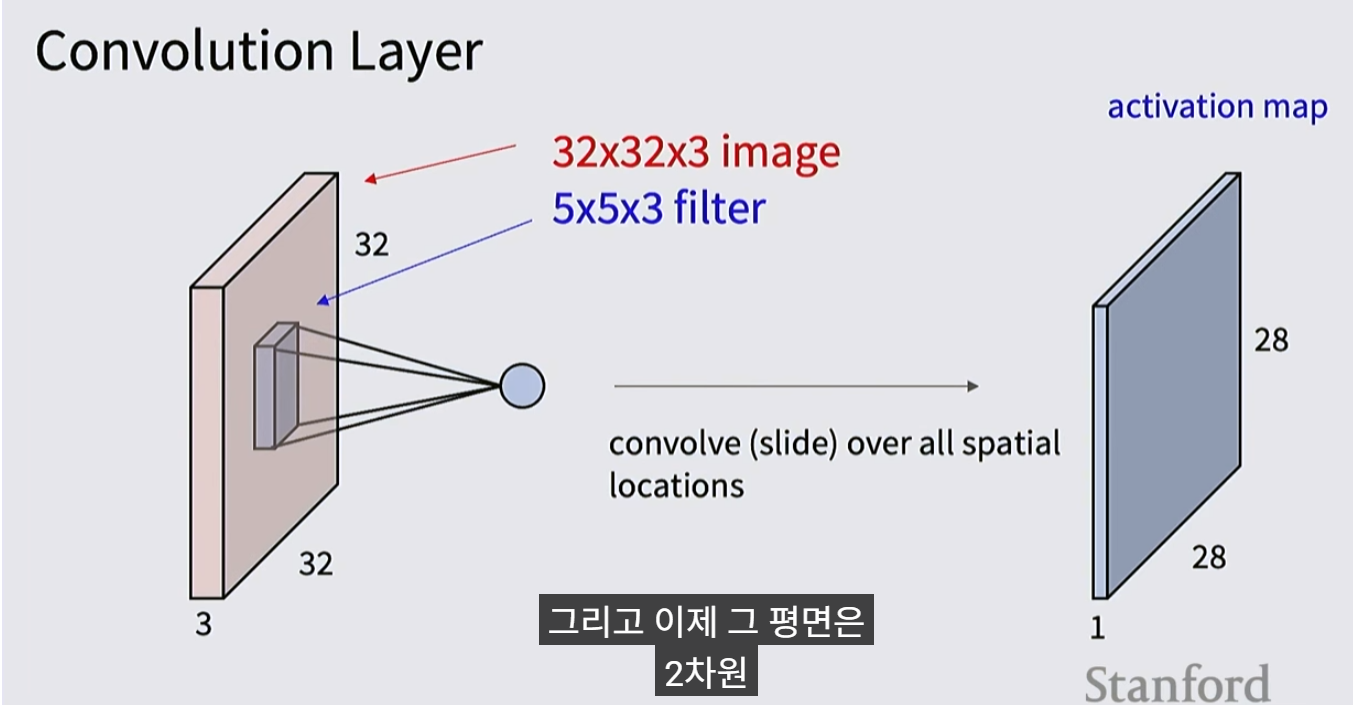

- 5×5×3 필터(템플릿)와 입력의 한 위치를 내적해서 나온 “스칼라 값”을, 그 위치에 대응되는 피처맵(feature map)의 한 픽셀로 옮기는 과정
  
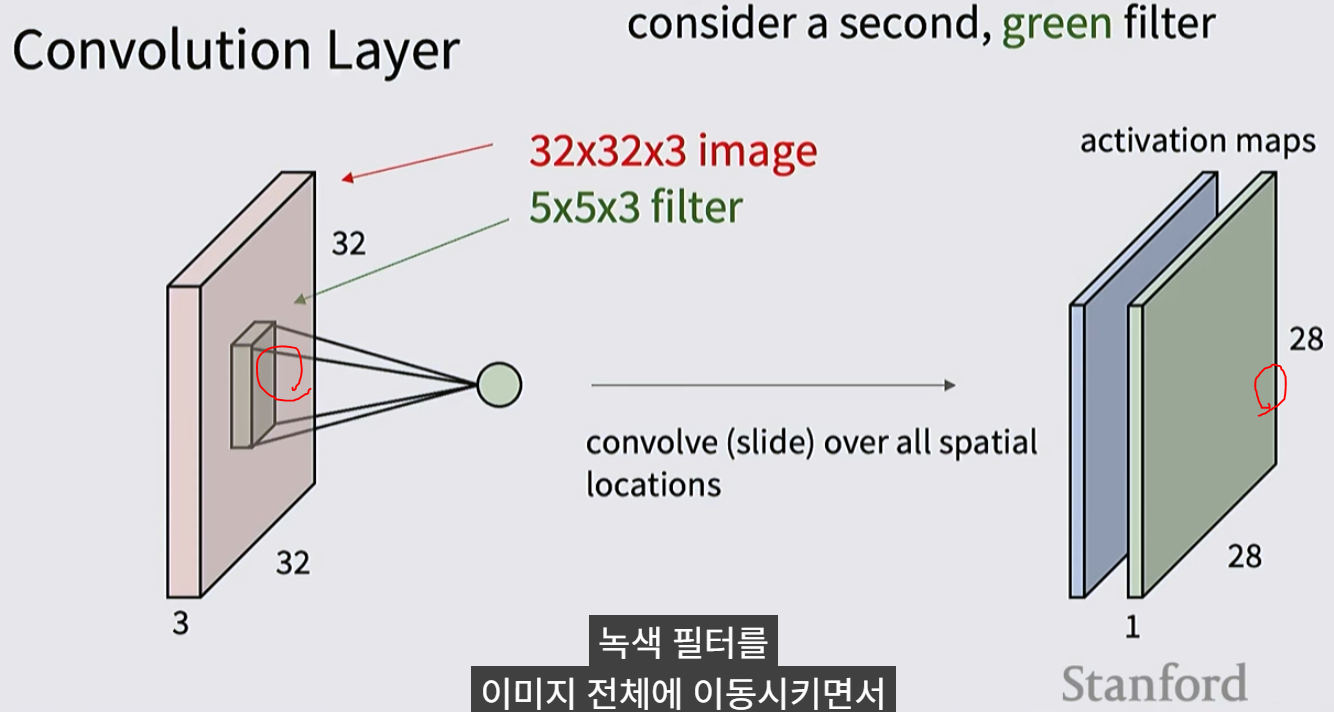
- 필터를 2개 또는 6개로 늘린 경우

- Conv2D(  in_channel s =3   out_channe l6=
  kernel_s i z =5
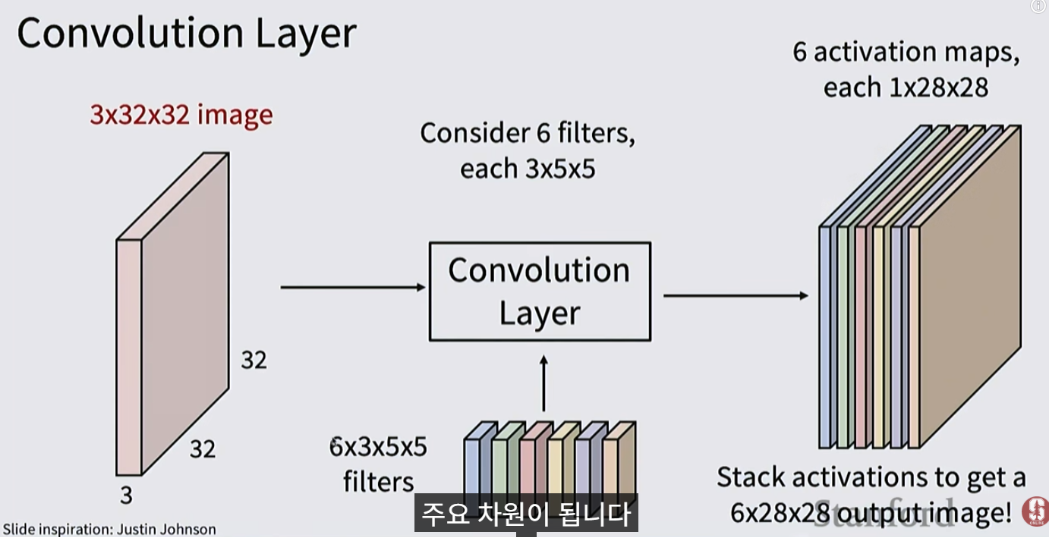

- 필터를 6개 썼을 때 Conv layer 전체의 입·출력 관계리  정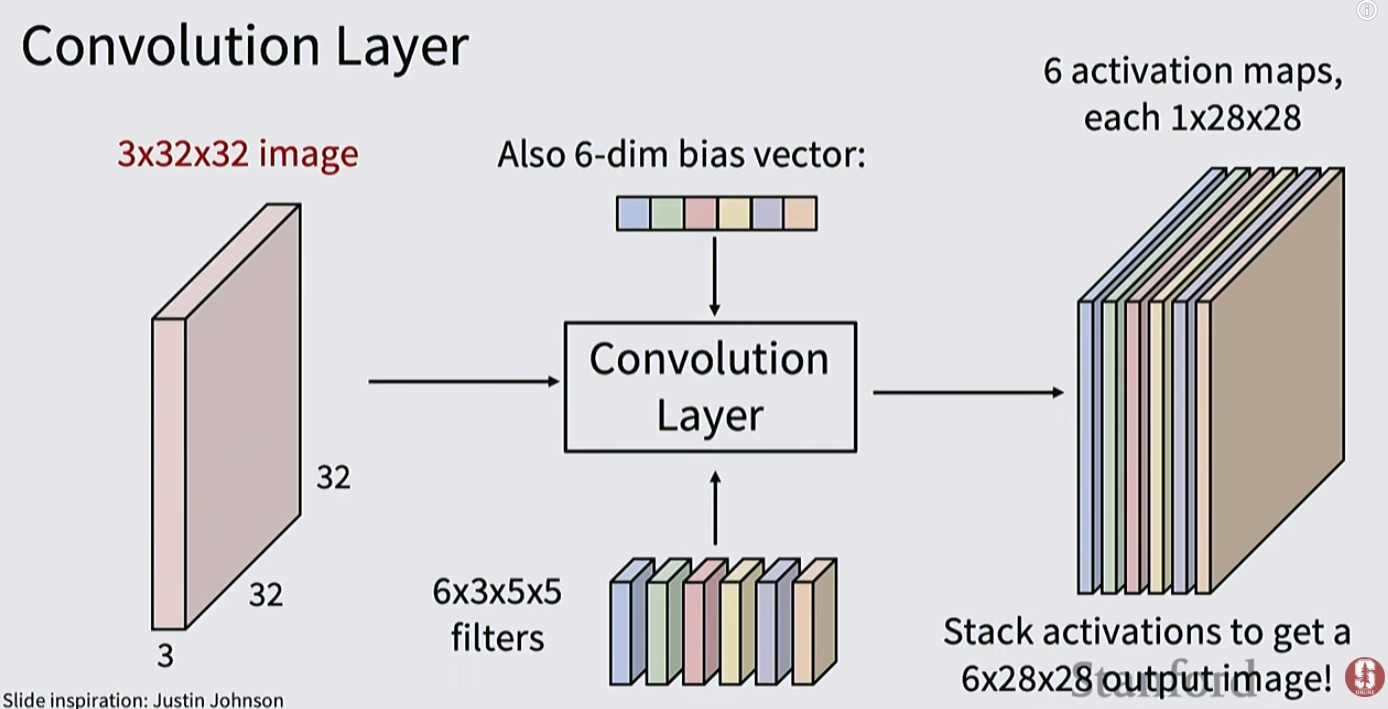p
- 리 예바이어스는 각 필터의 결과(피처맵)에 “통째로 더해지는 상수", 가중치는 청크와 내적을 하고, 바이어스는 그 결과 전체에 한 번에 더해짐정
- 